In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
df['target'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})


In [2]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.2, random_state=42)


# Decision Tree Classifier
Let's start by training a decision tree classifier on the training data:

In [3]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [4]:
y_pred = tree.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nAccuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score: 1.0


# Support Vector Machines (SVM)
Let's now train a support vector machine (SVM) classifier on the same dataset:

In [6]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [7]:
y_pred = svm.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nAccuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score: 1.0


# K-Nearest Neighbors (KNN)
Finally, let's train a K-nearest neighbors (KNN) classifier on the same dataset:

In [8]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = knn.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nAccuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score: 1.0


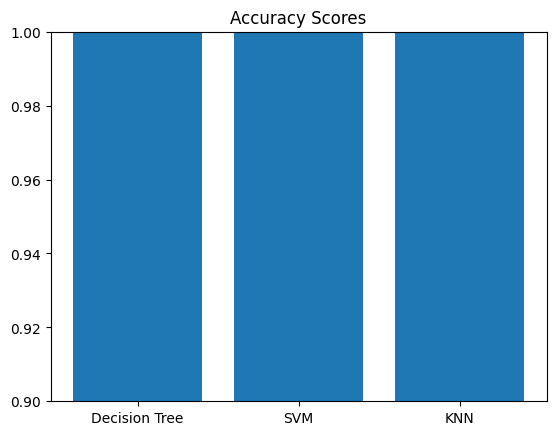

In [9]:
accuracy_scores = [accuracy_score(y_test, tree.predict(X_test)), 
                   accuracy_score(y_test, svm.predict(X_test)), 
                   accuracy_score(y_test, knn.predict(X_test))]
models = ['Decision Tree', 'SVM', 'KNN']

plt.bar(models, accuracy_scores)
plt.ylim(0.9, 1.0)
plt.title('Accuracy Scores')
plt.show()